# Einstiegsbeispiel nichtlineare Gleichungen

## Problemstellung

Gesucht ist eine Lösung des nichtlinearen Systems:

$$\begin{split}
6 x & = \cos(x)+2\,y\\
8 y & = x\,y^2+\sin(x).
\end{split}$$

In [1]:
import numpy as np
from numpy.linalg import norm
from scipy.linalg import lu, solve_triangular
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(16)

Für dieses zweidimensionale Problem können wir die Lösungsmenge als Contour-Graph veranschaulichen. Die gesuchte Lösung des Problems ist mit dem Schnittpunkt der beiden Contour-Graphen gegeben. Ziel ist es diese Lösung numerisch zu berechnen.

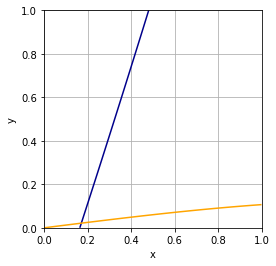

In [3]:
x = np.linspace(0,1,200);
y = np.linspace(0,1,200);
x,y = np.meshgrid(x,y);

plt.contour(x,y,6*x-np.cos(x)-2*y,[0],colors='darkblue')
plt.contour(x,y,8*y-x*y**2-np.sin(x),[0],colors='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect(1)
plt.grid()
plt.show()

## Fixpunkt-Iteration

Das oben formulierte Problem kann als Fixpunktgleichung geschrieben werden:
$$\begin{split}
x & = \frac{1}{6}(\cos(x)+2\, y)\\
y & = \frac{1}{8}(x\,y^2+\sin(x))
\end{split}$$
auf $E = [0,1]\times [0,1]$.
Die Fixpunktabbildung ist daher gegeben durch
$$f(x,y)= \begin{pmatrix}
\frac{1}{6}(\cos(x)+2\, y)\\
\frac{1}{8}(x\,y^2+\sin(x))
\end{pmatrix}$$

In [4]:
def f(xvec):
    x = xvec[0]
    y = xvec[1]
    return np.array([1/6*(np.cos(x)+2*y), 1/8*(x*y**2+np.sin(x))])

Für die Fixpunkt-Iteration
$$\begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix} = f(x_n,y_n)$$
wählen wir den Startwert $(0.5,0.5)^T$. Da wir gezeigt haben, dass $f$ eine Selbstabbildung und Kontraktion ist, können wir diesen beliebig in $E$ wählen. 

In [5]:
# Initialisierung
tol = 1e-10 # Abbruchtoleranz
N = 30      # max. Iterationen
n = 1       # Iterationsschritt

x = np.array([0.5,0.5]) # Startwert
xF = [x]                # Speichern der Fixpunkt Folge
resF = []

Fixpunkt-Iteration

In [6]:
xneu = f(x)
xF.append(xneu)
print(n, xneu, norm(x-xneu,np.inf))

res = norm(x-xneu,np.inf)
resF.append(res)
while (res > tol) and (n < N):
    n += 1
    x = xneu
    xneu = f(x)
    res = norm(x-xneu,np.inf)
    xF.append(xneu)
    print(n, xneu, res)
xF = np.array(xF)

1 [0.3129304269817288 0.0755531923255254] 0.4244468076744746
2 [0.1837569857873598 0.0387042953287801] 0.129173441194369
3 [0.1767621216708083 0.0228749825126977] 0.01582931281608242
4 [0.1716946959238987 0.0219919459701418] 0.0050674257469096595
5 [0.1715467551755266 0.021366926401073 ] 0.0006250195690688624
6 [0.171342626193391  0.0213481154155817] 0.00020412898213559294
7 [0.1713421601376687 0.0213229445177554] 2.5170897826339023e-05
8 [0.1713337830825503 0.0213228640831496] 8.37705511841369e-06
9 [0.171333994320229  0.0213218317343029] 1.0323488467724184e-06
10 [0.1713336442013866 0.0213218568215507] 3.5011884236269e-07
11 [0.1713336625128257 0.0213218137005058] 4.312104495349245e-08
12 [0.1713336476188043 0.0213218159175804] 1.4894021405087443e-08
13 [0.1713336487810593 0.0213218140842655] 1.8333149408300553e-09
14 [0.1713336481369275 0.0213218142258119] 6.4413174793998e-10
15 [0.1713336482024134 0.021321814146567 ] 7.924489883737174e-11


In [7]:
xFixpunkt = np.array(xneu)
print(xFixpunkt)

[0.1713336482024134 0.021321814146567 ]


Maximal notwendige Anzahl Iterationen

In [8]:
L = 0.5
np.int(1/np.log(L)*np.log(tol*(1-L)/norm(xF[1]-xF[0],np.inf))+0.5)

/var/folders/70/0hg50t5s43x_9dmy_8375r5r0000gq/T/ipykernel_21794/288613608.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.int(1/np.log(L)*np.log(tol*(1-L)/norm(xF[1]-xF[0],np.inf))+0.5)


33

## Newton-Verfahren

Mit Hilfe des Newton-Verfahren können Nullstellen berechnet werden. Wir betrachten daher für die Lösung des Problems die Nullstellengleichung
$$\begin{split}
\cos(x)+2\, y - 6\, x & = 0\\
x\,y^2+\sin(x) - 8\, y & = 0
\end{split}$$
mit der Nullstellenfunkton
$$G(x,y)= \begin{pmatrix}
\cos(x)+2\, y - 6\, x\\
x\,y^2+\sin(x) - 8\, y
\end{pmatrix}$$

In [9]:
def G(xvec):
    x = xvec[0]
    y = xvec[1]
    return np.array([np.cos(x)+2*y-6*x, x*y**2+np.sin(x)-8*y])

Die Jacobi-Matrix von $G$ ist gegeben durch
$$G'(x,y)= \begin{pmatrix}
-\sin(x) - 6 & 2\\
y^2+\cos(x) & 2\,x\,y - 8
\end{pmatrix}$$

In [10]:
def dG(xvec):
    x = xvec[0]
    y = xvec[1]
    return np.array([[-np.sin(x)-6, 2],
                     [y**2+np.cos(x), 2*x*y-8]])

In [11]:
# Initialisierung
tol = 1e-16 # Abbruchtoleranz
N = 30      # max. Iterationen
n = 0       # Iterationsschritt

x = np.array([0.5,0.5]) # Startwert
xN = [np.array(x)]                # Speichern der Newton Folge

Newton-Verfahren

In [12]:
res = norm(G(x),np.inf)
while (res > tol) and (n < N):
    n +=1

    # Lineares System lösen
    A = dG(x)
    b = G(x)
    P,L,R = lu(A)  # oder mit QR  
    z = solve_triangular(L,P.T@b, lower = True)
    delta = solve_triangular(R,z)

    # Update x
    x -= delta
    res = norm(G(x),np.inf)
    xN.append(np.array(x)) # Kopie speichern!
    print(n,x,res)
xN = np.array(xN)

1 [ 0.1717931174937131 -0.0020873091736384] 0.18764856729121346
2 [0.1713297031734245 0.0213095899418798] 9.381535385100115e-05
3 [0.1713336481766586 0.0213218141481005] 2.6331159475034838e-11
4 [0.1713336481764764 0.0213218141513725] 2.220446049250313e-16
5 [0.1713336481764764 0.0213218141513725] 0.0


## Vergleich der Konvergenz

Als exakte Lösung benutzen wir die letzte des Newton-Verfahrens.

In [13]:
xExact = np.array(x)

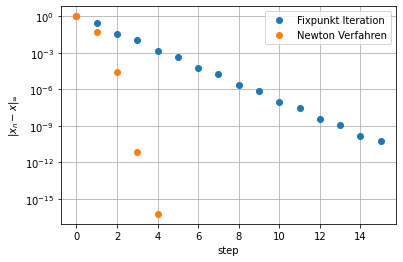

In [14]:
plt.semilogy(norm(xF-xExact,np.inf,axis=1)/norm(xF[0]-xExact,np.inf),'o',label='Fixpunkt Iteration')
plt.plot(norm(xN-xExact,np.inf,axis=1)/norm(xN[0]-xExact,np.inf),'o',label='Newton Verfahren')
plt.legend()
plt.xlabel('step')
plt.ylabel(r'$\|x_n-x\|_\infty$')
plt.grid()
#plt.savefig('KonvergenzEinstiegbeispiel.pdf')
plt.show()